In [98]:
import pandas as pd
import numpy as np
import math
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sb
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('pokemonquest.csv')
df2 = pd.read_csv('pokemonquest.csv')

In [57]:
df.head()

,Nom,PV,Attaque,Défense,Att. Spé.,Déf. Spé.,Vitesse,Unnamed: 7,Unnamed: 8
0,Bulbizarre,45.0,49.0,49.0,65.0,65.0,45.0,318,53
1,Herbizarre,60.0,62.0,63.0,80.0,80.0,60.0,405,"67,5"
2,Florizarre,80.0,82.0,83.0,100.0,100.0,80.0,525,"87,5"
3,Méga-Florizarre,80.0,100.0,123.0,122.0,120.0,80.0,625,"104,17"
4,Salamèche,39.0,52.0,43.0,NaN,50.0,65.0,309,"51,5"


In [58]:
df.columns = ['nom','pv','att','def','att_spe','def_spe','vitesse','tot','moy']
df.columns

Index(['nom', 'pv', 'att', 'def', 'att_spe', 'def_spe', 'vitesse', 'tot',
       'moy'],
      dtype='object')

In [59]:
# Remplacement de tous les charactères non numériques
df["tot"] = df["tot"].str.replace(r"[a-zA-Z]",'')
df["moy"] = df["moy"].str.replace(r"[a-zA-Z]",'')
df["moy"] = df["moy"].str.replace(r",",'.')
df["moy"] = df["moy"].str.replace(r";",'.')

In [60]:
# Transformation des colonnes en float
df["tot"]= pd.to_numeric(df["tot"], downcast ='float')

In [61]:
df["moy"]= pd.to_numeric(df["moy"], downcast ='float')


In [62]:
df.head()

,nom,pv,att,def,att_spe,def_spe,vitesse,tot,moy
0,Bulbizarre,45.0,49.0,49.0,65.0,65.0,45.0,318.0,53.000000
1,Herbizarre,60.0,62.0,63.0,80.0,80.0,60.0,405.0,67.500000
2,Florizarre,80.0,82.0,83.0,100.0,100.0,80.0,525.0,87.500000
3,Méga-Florizarre,80.0,100.0,123.0,122.0,120.0,80.0,625.0,104.169998
4,Salamèche,39.0,52.0,43.0,NaN,50.0,65.0,309.0,51.500000


In [63]:
# Colonne pv
for index, row in df.iterrows():
    val = row['pv']
    if math.isnan(val):
        df.loc[index, 'pv'] = ((row['tot']) - ((row['att'])+(row['def'])+(row['att_spe'])+(row['def_spe'])+(row['vitesse'])))


In [64]:
# Colonne att
for index, row in df.iterrows():
    val = row['att']
    if math.isnan(val):
        df.loc[index, 'att'] = ((row['tot']) - ((row['pv'])+(row['def'])+(row['att_spe'])+(row['def_spe'])+(row['vitesse'])))


In [65]:
# Colonne def
for index, row in df.iterrows():
    val = row['def']
    if math.isnan(val):
        df.loc[index, 'def'] = ((row['tot']) - ((row['pv'])+(row['att'])+(row['att_spe'])+(row['def_spe'])+(row['vitesse'])))


In [66]:
# Colonne att_spe
for index, row in df.iterrows():
    val = row['att_spe']
    if math.isnan(val):
        df.loc[index, 'att_spe'] = ((row['tot']) - ((row['pv'])+(row['att'])+(row['def'])+(row['def_spe'])+(row['vitesse'])))


In [67]:
# Colonne def_spe
for index, row in df.iterrows():
    val = row['def_spe']
    if math.isnan(val):
        df.loc[index, 'def_spe'] = ((row['tot']) - ((row['pv'])+(row['att'])+(row['def'])+(row['att_spe'])+(row['vitesse'])))


In [68]:
# Colonne vitesse
for index, row in df.iterrows():
    val = row['vitesse']
    if math.isnan(val):
        df.loc[index, 'vitesse'] = ((row['tot']) - ((row['pv'])+(row['att'])+(row['def'])+(row['att_spe'])+(row['def_spe'])))


In [69]:
# Vérification de l'absence de NaN dans les 6 premières colonnes
test = df.isnull().sum(axis = 0)[(df.isnull().sum(axis = 0))!=0]
test

tot     95
moy    103
dtype: int64

In [70]:
# On drop les deux dernière colonnes
df2 = df.drop(['tot', 'moy'], axis=1)
df2.head()

,nom,pv,att,def,att_spe,def_spe,vitesse
0,Bulbizarre,45.0,49.0,49.0,65.0,65.0,45.0
1,Herbizarre,60.0,62.0,63.0,80.0,80.0,60.0
2,Florizarre,80.0,82.0,83.0,100.0,100.0,80.0
3,Méga-Florizarre,80.0,100.0,123.0,122.0,120.0,80.0
4,Salamèche,39.0,52.0,43.0,60.0,50.0,65.0


In [71]:
# Stockage des noms de colonnes dans un array
names = df2.columns
names

Index(['nom', 'pv', 'att', 'def', 'att_spe', 'def_spe', 'vitesse'], dtype='object')

In [72]:
df2= df2.drop(['nom'], axis=1)
df2.head()

,pv,att,def,att_spe,def_spe,vitesse
0,45.0,49.0,49.0,65.0,65.0,45.0
1,60.0,62.0,63.0,80.0,80.0,60.0
2,80.0,82.0,83.0,100.0,100.0,80.0
3,80.0,100.0,123.0,122.0,120.0,80.0
4,39.0,52.0,43.0,60.0,50.0,65.0


In [74]:
# Stockage des valeurs dans un autre array
X = df2.values
X

array([[ 45.,  49.,  49.,  65.,  65.,  45.],
       [ 60.,  62.,  63.,  80.,  80.,  60.],
       [ 80.,  82.,  83., 100., 100.,  80.],
       ...,
       [ 88., 112.,  75., 102.,  80., 143.],
       [ 46.,  65.,  65.,  55.,  35.,  34.],
       [135., 143., 143.,  80.,  65.,  34.]])

"""
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
"""
La methode preprocessing permet de remodeler les données afin de les traitrer sur une échelle similaire. C'est pertinent par exemple quand nous avons mètres et des km.
Nous n'avons pas besoin car nos données sont deja à une échelle similaire. 

fit_transform() regroupe les deux méthodes suivantes:
-fit
calcule la moyenne et l'écart type pour adapter le modele aux données
-transform
applique le modele à la donnée pour la transformer


In [75]:
# Création d'un objet pca
pca = decomposition.PCA()
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [78]:
ACP = pca.fit_transform(X)
ACP
#std_scale = preprocessing.StandardScaler().fit(X)
#X_scaled = std_Scale.transform(X)

array([[-47.24779855,  -5.21056649,  19.86891604,  -0.43095945,
        -12.3890417 ,  -9.70284185],
       [-12.56335654,  -5.96610564,  21.63058429,   0.24460274,
         -5.42592379,  -6.64118004],
       [ 35.51012914,  -5.86778265,  22.0968405 ,   0.68482768,
          3.25447945,  -3.01217004],
       ...,
       [ 62.72871249, -50.56603514, -20.2781257 , -15.8559934 ,
         22.95248435,  11.30449945],
       [-53.17794829,  11.83890927,  -9.62003634,   1.35806217,
        -26.24240062,   5.89953733],
       [ 67.50240706,  70.85945841, -43.13195786,  45.21267506,
        -11.88255577,  23.62932899]])

In [77]:
pca.explained_variance_ratio_
# On peut voir qu'il faut trois composantes principales
# pour expliquer au moins 70% de variance

array([0.45427375, 0.19362961, 0.13723484, 0.09897258, 0.07281017,
       0.04307906])

In [82]:
# Création d'un dataframe
df_fin = pd.DataFrame(pca.components_, columns = df2.columns)
df_fin.head()

,pv,att,def,att_spe,def_spe,vitesse
0,0.312895,0.494564,0.381544,0.511775,0.390062,0.312834
1,0.049624,0.076524,0.676233,-0.381388,0.180789,-0.596866
2,-0.064545,-0.720447,0.028917,0.403298,0.536315,-0.160225
3,0.801875,0.008525,-0.362444,0.120213,-0.097065,-0.449093
4,0.414971,-0.218938,-0.014940,-0.622959,0.374796,0.501090


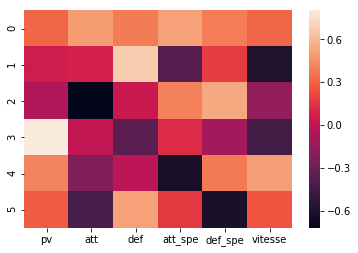

In [87]:
# On utilise seaborn afin de visualiser clairement les corrélation 
# entre composantes principales et colonnes
sb.heatmap(df_fin)

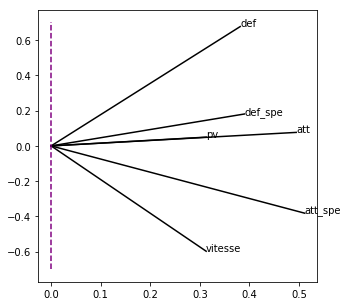

In [108]:
# BONUS 
# Autre visualisation avec un cercle de corrélation
fig = plt.figure(figsize=(5,5))

for i,(x,y) in enumerate(zip(pca.components_[0,:],pca.components_[1,:])):
    plt.plot([0,x],[0,y],color='k')
    plt.text(x,y,df_fin.columns[i])

plt.plot([0,0], [-0.7,0.7], color='purple', ls='--')